# matplotlib 応用 - OOP スタイル  

OOP - Object Oriented Programming (オブジェクト指向プログラミング スタイル)  

[matplotlibのめっちゃまとめ - Qiita](https://qiita.com/nkay/items/d1eb91e33b9d6469ef51)  

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## plt.figure()

[matplotlib.pyplot.figure](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure)

新しい Figure を作成します。  

- `figsize`: Figure のサイズ (横, 縦) 。単位はインチ。デフォルトは `(6.4, 4.8)`。  
- `dpi`: Figure の解像度 (dots per inch) 。デフォルトは `100.0`。  
- `facecolor`: Figure の背景色。デフォルトは `"white"`。  
- `edgecolor`: Figure の枠の色。デフォルトは `"white"`。  
- `linewidth`: Figure の枠の幅。  
- `tight_layout`: イイ感じに調整してくれる？デフォルトは `"False"`。  

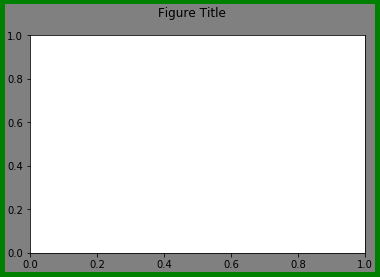

In [109]:
fig = plt.figure(facecolor="gray", linewidth=10, edgecolor="green")

fig.suptitle("Figure Title")  # Figure 全体のタイトル

ax = fig.add_subplot(1, 1, 1)
plt.show()

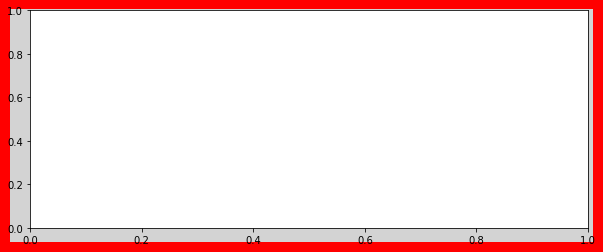

In [45]:
fig = plt.figure(figsize=(10, 4), facecolor="lightgray", linewidth=20, 
                 edgecolor="red")

ax = fig.add_subplot(1, 1, 1)
plt.show()

## Figure.add_subplot()  

[matplotlib.figure.Figure.add_subplot](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot)  

Axes (AxesSubplot) を Figure にひとつずつ追加します。  

- はじめの 3 つの引数 (整数) は、`nrow, ncol, index` は、Figure を `nrow` 行 `ncol` 列に分解したときの `index` 番目 (**先頭 は** `1` **から！**) の位置に Axes を追加することを表している。  
それぞれの引数が 1 桁である場合、`2, 3, 1` → `231` のようにまとめて 3 桁の数値で指定することもできる。  
- `title`: Axes の表題。  
- `fc`: Axes のプロットエリアの背景色。  
- `xlabel`/`ylabel`: Axes の x 軸/y 軸のラベル。  
- `xticks`/`yticks`: Axes の x 軸/y 軸の目盛の位置。1 次元の `arraylike` で指定。  
- `xticklabels`/`yticklabels`: Axes の x 軸/y 軸の目盛の値。1 次元の `arraylike` で指定。`xticks`/`yticks` の要素数に合わせる。  
- `xmargin`/`ymargin`: データの最小値/最大値から縦/横軸までの間隔。  
- `alpha`: 透明度。 $0 \leq \alpha \leq 1$  

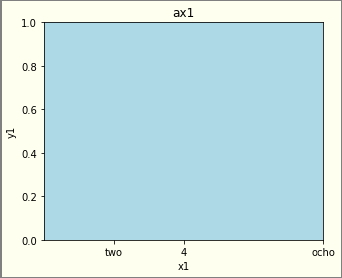

In [60]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray")

ax1 = fig.add_subplot(1, 1, 1, title="ax1", fc="lightblue", 
                      xlabel="x1", ylabel="y1", 
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"])
plt.show()

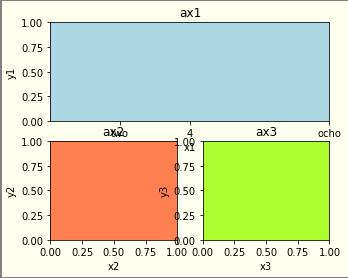

In [66]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray")

ax1 = fig.add_subplot(2, 1, 1, title="ax1", fc="lightblue", 
                      xlabel="x1", ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"])

ax2 = fig.add_subplot(2, 2, 3, title="ax2", fc="coral", 
                      xlabel="x2", ylabel="y2")

ax3 = fig.add_subplot(2, 2, 4, title="ax3", fc="greenyellow", 
                      xlabel="x3", ylabel="y3")

plt.show()

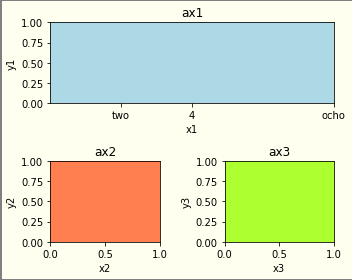

In [105]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

ax1 = fig.add_subplot(2, 1, 1, title="ax1", fc="lightblue", 
                      xlabel="x1", ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"])

ax2 = fig.add_subplot(2, 2, 3, title="ax2", fc="coral", 
                      xlabel="x2", ylabel="y2")

ax3 = fig.add_subplot(2, 2, 4, title="ax3", fc="greenyellow", 
                      xlabel="x3", ylabel="y3")

plt.show()

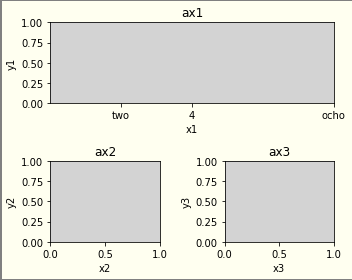

In [88]:
# 共通の設定
common_settings = {"fc": "lightgray"}  # 共通の設定を dict に → ※

fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

ax1 = fig.add_subplot(2, 1, 1, title="ax1", xlabel="x1", ylabel="y1",
                      xticks=[2, 4, 8], xticklabels=["two", "4", "ocho"], 
                      **common_settings)  # ← ※ **でアンパッキングして渡す

ax2 = fig.add_subplot(2, 2, 3, title="ax2", xlabel="x2", ylabel="y2", 
                      **common_settings)  # ← ※

ax3 = fig.add_subplot(2, 2, 4, title="ax3", xlabel="x3", ylabel="y3", 
                      **common_settings)  # ← ※

plt.show()

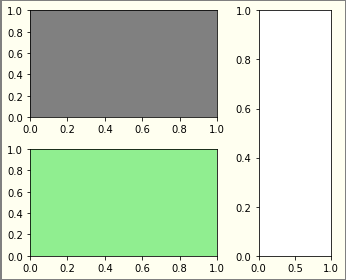

In [182]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

gs = fig.add_gridspec(2, 3)  # Figure の figsize の範囲を 2 行 3 列に分割

ax1 = fig.add_subplot(gs[0, 0:2], facecolor='gray')        # 0 行 の 0-1 列
ax2 = fig.add_subplot(gs[1, 0:2], facecolor='lightgreen')  # 1 行 の 0-1 列
ax3 = fig.add_subplot(gs[:, 2])                            # 0-1 行 の 3 列

plt.show()

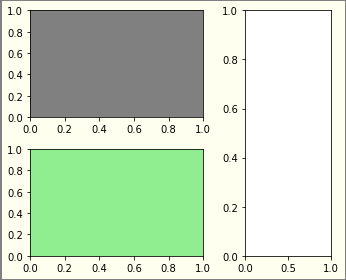

In [185]:
fig = plt.figure(figsize=(5, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

gs = fig.add_gridspec(2, 2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0], facecolor='gray')
ax2 = fig.add_subplot(gs[2], facecolor='lightgreen')
ax3 = fig.add_subplot(gs[:, 1])                        # 0-1 行 の 3 列

plt.show()

## plt.subplots()  

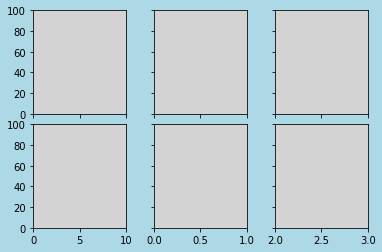

In [92]:
common_settings = {"fc": "lightgray"}  # 共通の設定を dict に → ※

# Figure と、 2 行 3 列の計 6 つの Axes (を格納した np.ndarray) を作成
fig, ax = plt.subplots(2, 3, facecolor="lightblue",
                       sharex="col", sharey=True,   # ← ※※
                       subplot_kw=common_settings)  # ← ※

fig.subplots_adjust(wspace=0.3, hspace=0.1)  # Axes 同士の間隔を調整 

ax[0, 0].set_xlim(0, 10)   # 左上の Axes の x 軸の範囲を 0-10 に設定
ax[1, 2].set_xlim(2, 3)    # 右下の Axes の x 軸の範囲を 2-3 に設定
ax[0, 0].set_ylim(0, 100)  # 左上の Axes の y 軸の範囲を 0-100 に設定
                           # ※※ sharex="col" なので x 軸は列ごとに、
                           # sharey=True なので y 軸はすべてに適用される
plt.show()

## 練習  

### グラフを並べて表示する subplots() 関数  

上のふたつのグラフをひとつのセルに並べて表示するには `subplots()` 関数を使います。`subplots()` の第 1 引数は行数（縦に幾つグラフを並べるか）で、第 2 引数は列数（横に幾つグラフを並べるか）です。縦横に複数並べることもできます。このように並べられたそれぞれのグラフ枠を「パネル」と呼ぶこともあります。  

`plt.subplots()` で取得した `Figure` に対しては背景色などを指定し、`AxesSubplot` に対して `plt.plot()` と同様にひとつひとつ図を描画させることが可能です。 

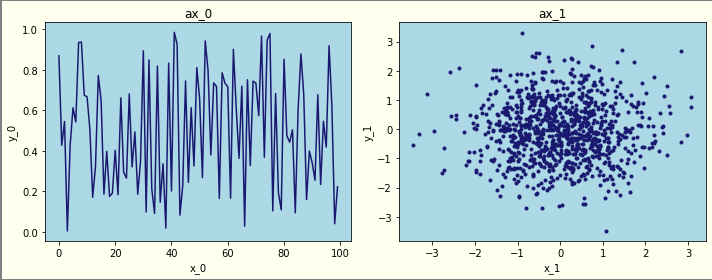

In [161]:
x_0 = np.arange(100)
y_0 = np.random.rand(100)
x_1 = np.random.randn(1000)
y_1 = np.random.randn(1000)

fig = plt.figure(figsize=(10, 4), facecolor="ivory", linewidth=3, 
                 edgecolor="gray", tight_layout=True)

ax_0 = fig.add_subplot(1, 2, 1, title="ax_0", fc="lightblue", 
                      xlabel="x_0", ylabel="y_0")
ax_0.plot(x_0, y_0, c="midnightblue")

ax_1 = fig.add_subplot(1, 2, 2, title="ax_1", fc="lightblue", 
                      xlabel="x_1", ylabel="y_1")
ax_1.scatter(x_1, y_1, c="midnightblue", marker=".")

plt.show()

`subplots()` の名前付き引数 `figsize=` に整数値のタプル/リストを与えることでサイズを指定できます。  

### 応用  

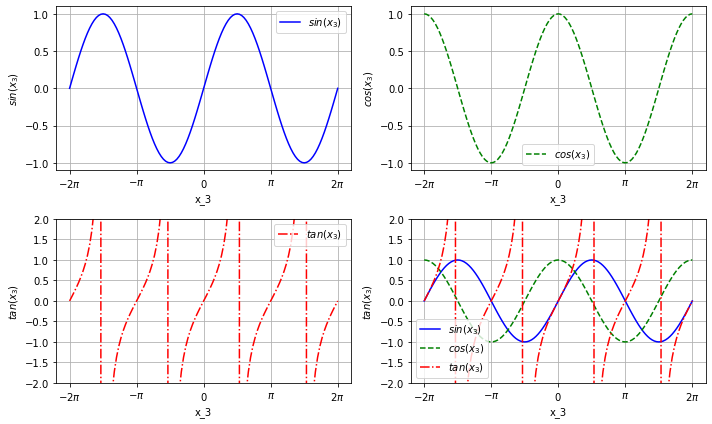

In [176]:
x_3 = np.linspace(-2*np.pi, 2*np.pi, 121)
common_settings = {
    "xlabel": "x_3", 
    "xticks": np.linspace(-2*np.pi, 2*np.pi, 5),
    "xticklabels": ["$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$"]
}

# 2 行 2 列 のレイアウト/共通設定を一括指定
fig, ax = plt.subplots(2, 2, figsize=(10, 6), tight_layout=True, 
                       subplot_kw=common_settings)  

y_list = [[np.sin(x_3)], 
          [np.cos(x_3)], 
          [np.tan(x_3)], 
          [np.sin(x_3), np.cos(x_3), np.tan(x_3)]]

y_prop_list = [[{"label": "$sin(x_3)$", "c": "b", "ls": "-"}], 
               [{"label": "$cos(x_3)$", "c": "g", "ls": "--"}],
               [{"label": "$tan(x_3)$", "c": "r", "ls": "-."}],
               [{"label": "$sin(x_3)$", "c": "b", "ls": "-"}, 
                {"label": "$cos(x_3)$", "c": "g", "ls": "--"},
                {"label": "$tan(x_3)$", "c": "r", "ls": "-."}]]

setting_list = [{"ylabel": "$sin(x_3)$",}, 
                {"ylabel": "$cos(x_3)$",}, 
                {"ylabel": "$tan(x_3)$", "ylim": (-2, 2)},
                {"ylabel": "$tan(x_3)$", "ylim": (-2, 2)}]

for a, y, y_p, s in zip(ax.flatten(), y_list, y_prop_list, setting_list):
    for y_, y_p_ in zip(y, y_p): 
        a.plot(x_3, y_, **y_p_)
    a.set(**s)
    a.legend()
    a.grid()
    
# fig.savefig("subplots_0.png")  # 図をファイルに保存
plt.show()

legend() の引数について  

- `bbox_to_anchor=` は、 凡例の枠の図全体に対する相対的な位置を決定します。図全体の左下を `(0, 0)`、 右上を `(1, 1)` としたタプルで与えます。  
- `loc=` は、`bbox_to_anchor` で指定した位置に凡例の枠のどの部分を合わせるかを決定します。`loc="upper left"` でアンカーに枠の左上を合わせます。  
- `borderaxespad=` は、上記のふたつの要素の距離を設定することができます。  

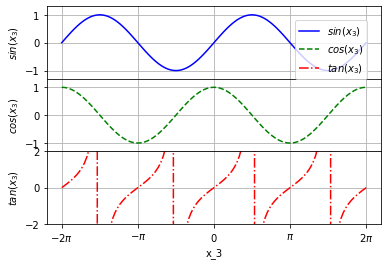

In [175]:
common_settings = {
    "xlabel": "x_3", 
    "xticks": np.linspace(-2*np.pi, 2*np.pi, 5),
    "xticklabels": ["$-2\pi$", "$-\pi$", "$0$", "$\pi$", "$2\pi$"]
}

# 3 行 のレイアウト/sharex=True で x 軸を共有する
fig, ax = plt.subplots(3, sharex=True, subplot_kw=common_settings)  

plt.subplots_adjust(hspace=0.0)  # 図同士の間隔

y_list = [[np.sin(x_3)], 
          [np.cos(x_3)], 
          [np.tan(x_3)]]

y_prop_list = [[{"label": "$sin(x_3)$", "c": "b", "ls": "-"}], 
               [{"label": "$cos(x_3)$", "c": "g", "ls": "--"}],
               [{"label": "$tan(x_3)$", "c": "r", "ls": "-."}]]

setting_list = [{"ylabel": "$sin(x_3)$", "ylim": (-1.3, 1.3)}, 
                {"ylabel": "$cos(x_3)$", "ylim": (-1.3, 1.3)}, 
                {"ylabel": "$tan(x_3)$", "ylim": (-2, 2)}]

for a, y, y_p, s in zip(ax.flatten(), y_list, y_prop_list, setting_list):
    for y_, y_p_ in zip(y, y_p): 
        a.plot(x_3, y_, **y_p_)
    a.set(**s)
    a.grid()
    
fig.legend(bbox_to_anchor=(0.85, 0.85), loc="upper right", 
           borderaxespad=0)  # Figure の凡例をまとめて表示

plt.show()

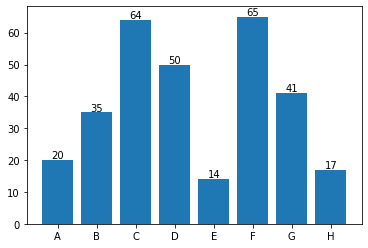

In [197]:
name = ["A", "B", "C", "D", "E", "F", "G", "H"]
age = [  20,  35,  64,  50,  14,  65,  41,  17]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(idx, age)
[ax.text(i, age[i]+0.5, age[i], horizontalalignment="center") 
 for i in range(len(name))]
plt.show()

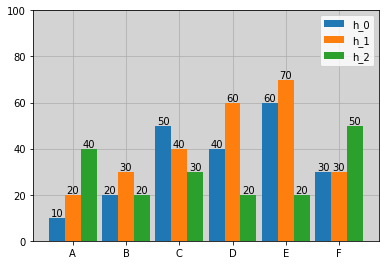

In [217]:
x_labels =        ["A", "B", "C", "D", "E", "F"]
heights = {"h_0": [ 10,  20,  50,  40,  60,  30],
           "h_1": [ 20,  30,  40,  60,  70,  30], 
           "h_2": [ 40,  20,  30,  20,  20,  50]}

fig = plt.figure()
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), facecolor="lightgray", 
                  xticks=np.arange(len(x_labels)), xticklabels=x_labels,
                  ylim=(0, 100))

width = 0.3
i = -1
for h in heights:
    x = np.arange(len(x_labels))+i*width
    ax.bar(x, height=heights[h], label=h, width=width, zorder=10)
    
    for x_, h_ in zip(x, heights[h]):
        ax.text(x_, h_+0.5, h_, horizontalalignment="center")
    
    i += 1

ax.legend()
ax.grid(zorder=5)

plt.show()